## Singular Value Decomposition (SVD)

So where does SVD fit into the overall picture? SVD deals with decomposing a matrix into a product of 3 matrices as shown:
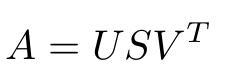
If the dimensions of A are m x n:

    U is an m x m matrix of Left Singular Vectors
    S is an m x m rectangular diagonal matrix of Singular Values arranged in decreasing order
    V is an  n x m matrix of Right Singular Vectors
    
#### Why is SVD used in Dimensionality Reduction?

You might be wondering why we should go through with this seemingly painstaking decomposition. The reason can be understood by an alternate representation of the decomposition. See the figure below:

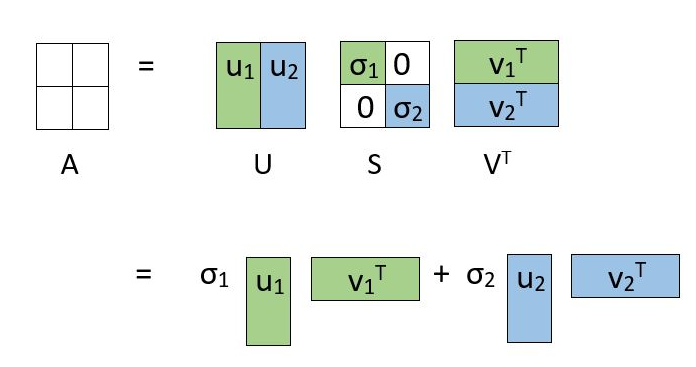

The decomposition allows us to express our original matrix as a linear combination of low-rank matrices.

In a practical application, you will observe that only the first few, say k, singular values are large. The rest of the singular values approach zero. As a result, terms except the first few can be ignored without losing much of the information. See how the matrices are truncated in the figure below:

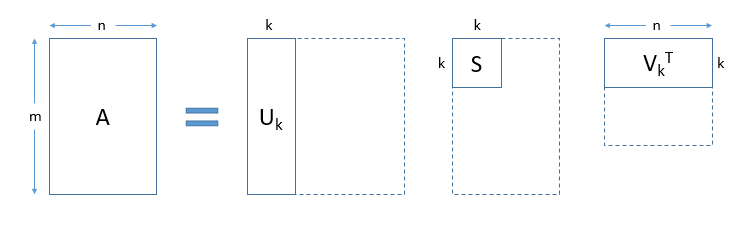

To summarize:

    Using SVD, we are able to represent our large matrix A by 3 smaller matrices U, S and V
    This is helpful in large computations
    We can obtain a k-rank approximation of A. To do this, select the first k singular values and truncate the 3 matrices accordingly


### SVD in NumPy
You can obtain the complete matrices U, S, and V using SVD in numpy.linalg. Note that S is a diagonal matrix which means that most of its entries are zeros. This is called a sparse matrix. To save space, S is returned as a 1D array of singular values instead of the complete 2D matrix.

In [1]:
import numpy as np
from numpy.linalg import svd

# define your matrix as a 2D numpy array
A = np.array([[4, 0], [3, -5]])

U, S, VT = svd(A)

print("Left Singular Vectors:")
print(U)
print("Singular Values:") 
print(np.diag(S))
print("Right Singular Vectors:") 
print(VT)

Left Singular Vectors:
[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
Singular Values:
[[6.32455532 0.        ]
 [0.         3.16227766]]
Right Singular Vectors:
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


### Truncated SVD in scikit-learn

In most common applications, we do not want to find the complete matrices U, S and V. We saw this in dimensionality reduction and Latent Semantic Analysis, remember?

We are ultimately going to trim our matrices, so why find the complete matrices in the first place?

In such cases, it is better to use TruncatedSVD from sklearn.decomposition. You specify the number of features you want in the output as the n_components parameter. n_components should be strictly less than the number of features in the input matrix:

In [2]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
print("Original Matrix:")
print(A)

svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(A)

print("Singular values:")
print(svd.singular_values_)

print("Transformed Matrix after reducing to 2 features:")
print(A_transf)

Original Matrix:
[[-1  2  0]
 [ 2  0 -2]
 [ 0 -2  1]]
Singular values:
[3. 3.]
Transformed Matrix after reducing to 2 features:
[[-1.51899219 -1.64093349]
 [-1.36152331  2.47916403]
 [ 2.19975385  0.40135148]]


### Randomized SVD in scikit-learn

Randomized SVD gives the same results as Truncated SVD and has a faster computation time. While Truncated SVD uses an exact solver ARPACK, Randomized SVD uses approximation techniques.

In [3]:
import numpy as np
from sklearn.utils.extmath import randomized_svd

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
u, s, vt = randomized_svd(A, n_components = 2)

print("Left Singular Vectors:")
print(u)

print("Singular Values:") 
print(np.diag(s))

print("Right Singular Vectors:") 
print(vt)

Left Singular Vectors:
[[ 0.73786479  0.10540926]
 [-0.42163702  0.84327404]
 [-0.52704628 -0.52704628]]
Singular Values:
[[3. 0.]
 [0. 3.]]
Right Singular Vectors:
[[-0.52704628  0.84327404  0.10540926]
 [ 0.52704628  0.42163702 -0.73786479]]
